# Decision Trees & Random Forests

A **Decision Tree** is a machine learning model used for classification and regression tasks. It works by breaking down a dataset into smaller subsets based on different criteria, and at the same time, an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

**Random Forest** is like building multiple Decision Trees, but with two key differences:

- **Random Sampling of Data**: Each tree in a Random Forest is trained on a random subset of the data (bootstrapping), meaning different trees see different parts of the data. This helps in making the ensemble more robust to noise and less likely to overfit.

- **Random Selection of Features**: At each split in the tree, a random subset of features is considered. This ensures that the trees in the forest are different from each other and makes the ensemble less sensitive to specific features.

By combining the predictions from multiple such trees, Random Forests average out their biases and variances, leading to more accurate and stable predictions overall.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('./filez/kyphosis.csv')
df.head(3)
# Kyphosis: absent or present after the operation
# Age: in months (children)
# Number: # of vertebrae involved in the operation
# Start: first or top most vertebrae that was operated on

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


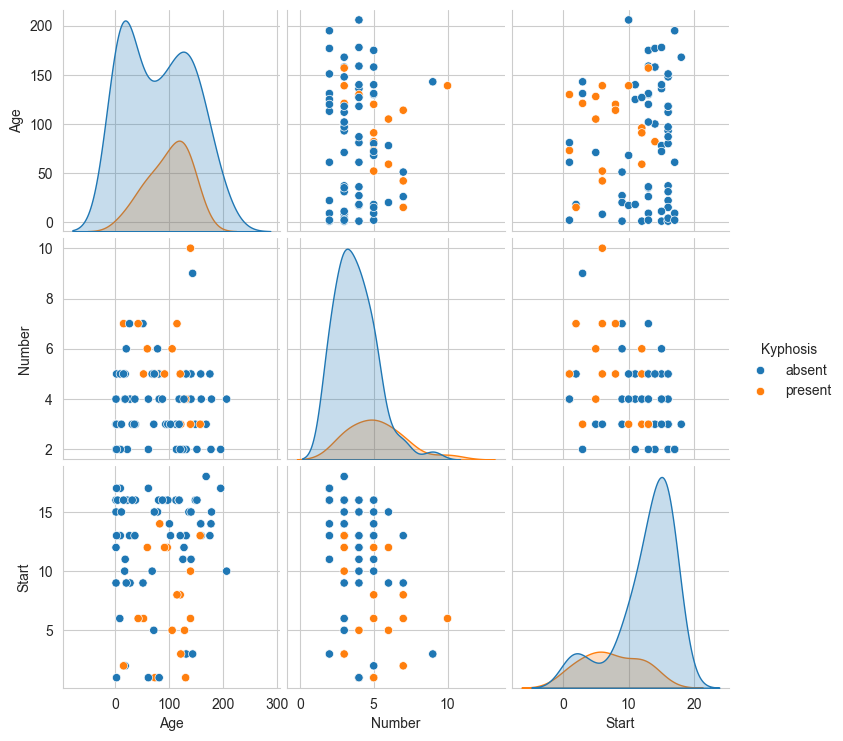

In [5]:
sns.pairplot(data=df, hue='Kyphosis')

## Decision Tree

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("Kyphosis", axis=1)
y = df["Kyphosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

- **ccp_alpha**=0.0 (Complexity parameter used for Minimal Cost-Complexity Pruning): The tree is pruned to avoid overfitting.
- **class_weight**=None (Weights associated with classes): Used for imbalanced datasets to give more weight to under-represented classes.
- **criterion**='gini' (The function to measure the quality of a split): Supports "gini" for Gini impurity and "entropy" for information gain.
- **max_depth**=None (Maximum depth of the tree): If None, nodes expand until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **max_features**=None (Number of features to consider when looking for the best split): Can improve efficiency and effectiveness of tree-building process.
- **max_leaf_nodes**=None (Best nodes are defined as relative reduction in impurity): Grow a tree with max_leaf_nodes in best-first fashion.
min_impurity_decrease=0.0 (A node will be split if this split induces a decrease of the impurity greater than or equal to this value): Helps control the growth of the tree.
- **min_samples_leaf**=1 (Minimum number of samples required to be at a leaf node): A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.
- **min_samples_split**=2 (Minimum number of samples required to split an internal node): The smallest number of samples that must be in a node for a split to be attempted.
- **min_weight_fraction_leaf**=0.0 (Minimum weighted fraction of the sum total of weights required to be at a leaf node): Similar to min_samples_leaf but expressed as a fraction of the total number of weighted instances.
- **random_state**=None (Controls the randomness of the estimator): Ensures that the splits are deterministic.
- **splitter**='best' (The strategy to choose the split at each node): Options are "best" to choose the best split and "random" to choose the best random split.

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test, dtree_pred))

[[15  3]
 [ 2  5]]
              precision    recall  f1-score   support

      absent       0.88      0.83      0.86        18
     present       0.62      0.71      0.67         7

    accuracy                           0.80        25
   macro avg       0.75      0.77      0.76        25
weighted avg       0.81      0.80      0.80        25



## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

- **bootstrap**=True (Whether bootstrap samples are used when building trees): If True, individual trees are fit on random subsets of the data.
- **ccp_alpha**=0.0 (Complexity parameter used for Minimal Cost-Complexity Pruning): The tree is pruned to avoid overfitting.
- **class_weight**=None (Weights associated with classes): Used for imbalanced datasets to give more weight to under-represented classes.
- **criterion**='gini' (The function to measure the quality of a split): Supports "gini" for Gini impurity and "entropy" for information gain.
- **max_depth**=None (Maximum depth of the tree): If None, trees grow until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **max_features**='sqrt' (Number of features to consider when looking for the best split): Can be "auto", "sqrt", "log2", or a fraction of features to consider for each split.
- **max_leaf_nodes**=None (Best nodes are defined as relative reduction in impurity): Grow trees with max_leaf_nodes in best-first fashion.
- **max_samples**=None (Number of samples to draw from X to train each base estimator): If None, then draw X.shape[0] samples.
- **min_impurity_decrease**=0.0 (A node will be split if this split induces a decrease of the impurity greater than or equal to this value): Controls tree growth.
- **min_samples_leaf**=1 (Minimum number of samples required to be at a leaf node): A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.
- **min_samples_split**=2 (Minimum number of samples required to split an internal node): The smallest number of samples that must be in a node for a split to be attempted.
- **min_weight_fraction_leaf**=0.0 (Minimum weighted fraction of the sum total of weights required to be at a leaf node): Similar to min_samples_leaf but as a fraction of the total number of weighted instances.
- **n_estimators**=200 (Number of trees in the forest): The number of trees in the forest.
- **n_jobs**=None (Number of jobs to run in parallel when fitting and predicting): If None, then tasks are run sequentially.
- **oob_score**=False (Whether to use out-of-bag samples to estimate the generalization accuracy): If True, it adds a method to estimate the generalization accuracy.
- **random_state**=None (Controls the randomness of the bootstrap samples and the selection of features to consider when looking for the best split): Ensures reproducibility.
- **verbose**=0 (Controls the verbosity when fitting and predicting): Higher values give more detailed messages.
- **warm_start**=False (When set to True, reuse the solution of the previous call to fit to add more estimators to the ensemble): If False, just fit a whole new forest.

In [10]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[17  1]
 [ 4  3]]
              precision    recall  f1-score   support

      absent       0.81      0.94      0.87        18
     present       0.75      0.43      0.55         7

    accuracy                           0.80        25
   macro avg       0.78      0.69      0.71        25
weighted avg       0.79      0.80      0.78        25



In [11]:
# there are quite more cases of 'absent' than 'present', so the dataset
# is unbalanced and this can affect the models.
df['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

As datasets get larger, **Random Forest** will perform better than Decision Tree. In general, Random Forests are often considered superior to single Decision Trees for several reasons:

- **Robustness and Accuracy**: Random Forests are an ensemble method, meaning they combine predictions from multiple decision trees to make more accurate predictions. Each tree in a Random Forest is built on a random subset of the data, which helps in reducing the variance and avoiding overfitting.

- **Handling Overfitting**: While a single decision tree can easily overfit to the noise in the training data, Random Forests mitigate this by averaging multiple trees, which generally leads to better generalization on unseen data.

- **Versatility**: Random Forests can handle both classification and regression tasks well and are less impacted by outliers and non-linear data compared to single trees.

- **Feature Importance**: They provide insights into feature importance, which can be beneficial for understanding the data.

Despite these advantages, Random Forests are more computationally expensive than single Decision Trees and can be less interpretable due to their complexity.